In [4]:
import pandas as pd
import seaborn as sns

In [5]:
import numpy as np

In [6]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
from sklearn.linear_model import LinearRegression

## Dividing the data into train and test samples

In [3]:
data = pd.read_csv('student-mat.csv')

NameError: name 'pd' is not defined

In [28]:
data = data[data['G3'] != 0]

In [2]:
X = data.drop(columns=['G3'])
y = data['G3']

NameError: name 'data' is not defined

In [1]:
X

NameError: name 'X' is not defined

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=0)

In [76]:
len(X_train)

307

In [77]:
len(X_test)

50

## Exploratory data analysis 

In [78]:
X_y_train = X_train.copy(deep=True)

In [79]:
X_y_train['y'] = y_train

In [80]:
X_y_train.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,y
age,1.000000,-0.143667,-0.152028,0.124947,-0.012044,0.265867,0.105719,0.018381,0.127471,-0.066960,0.232719,-0.058061,-0.163554
Medu,-0.143667,1.000000,0.622469,-0.189125,0.059405,-0.217911,-0.005481,-0.021037,0.080858,-0.030022,0.052977,0.180870,0.205427
Fedu,-0.152028,0.622469,1.000000,-0.194381,-0.031392,-0.265805,-0.031753,-0.054498,0.029325,-0.007715,-0.015996,0.160996,0.150231
traveltime,0.124947,-0.189125,-0.194381,1.000000,-0.105084,0.131414,-0.002823,-0.007708,0.062239,0.016959,0.028547,-0.119743,-0.131757
studytime,-0.012044,0.059405,-0.031392,-0.105084,1.000000,-0.136720,0.063829,-0.132218,-0.018720,-0.087165,-0.098216,0.156326,0.158553
failures,0.265867,-0.217911,-0.265805,0.131414,-0.136720,1.000000,-0.020901,0.133293,0.195804,0.042964,0.161519,-0.326272,-0.311091
famrel,0.105719,-0.005481,-0.031753,-0.002823,0.063829,-0.020901,1.000000,0.183048,0.068130,0.140506,-0.073748,0.052678,0.075401
freetime,0.018381,-0.021037,-0.054498,-0.007708,-0.132218,0.133293,0.183048,1.000000,0.255339,0.086641,-0.074686,-0.023542,-0.051553
goout,0.127471,0.080858,0.029325,0.062239,-0.018720,0.195804,0.068130,0.255339,1.000000,-0.061314,0.057467,-0.170340,-0.196119
health,-0.066960,-0.030022,-0.007715,0.016959,-0.087165,0.042964,0.140506,0.086641,-0.061314,1.000000,-0.057903,-0.074392,-0.071237


In [81]:
corr = X_y_train.corr()['y']

In [82]:
corr = corr[(corr >= 0.1) | (corr <= -0.1)]

In [83]:
corr

age          -0.163554
Medu          0.205427
Fedu          0.150231
traveltime   -0.131757
studytime     0.158553
failures     -0.311091
goout        -0.196119
absences     -0.229859
G1            0.896589
y             1.000000
Name: y, dtype: float64

<AxesSubplot: xlabel='G1', ylabel='y'>

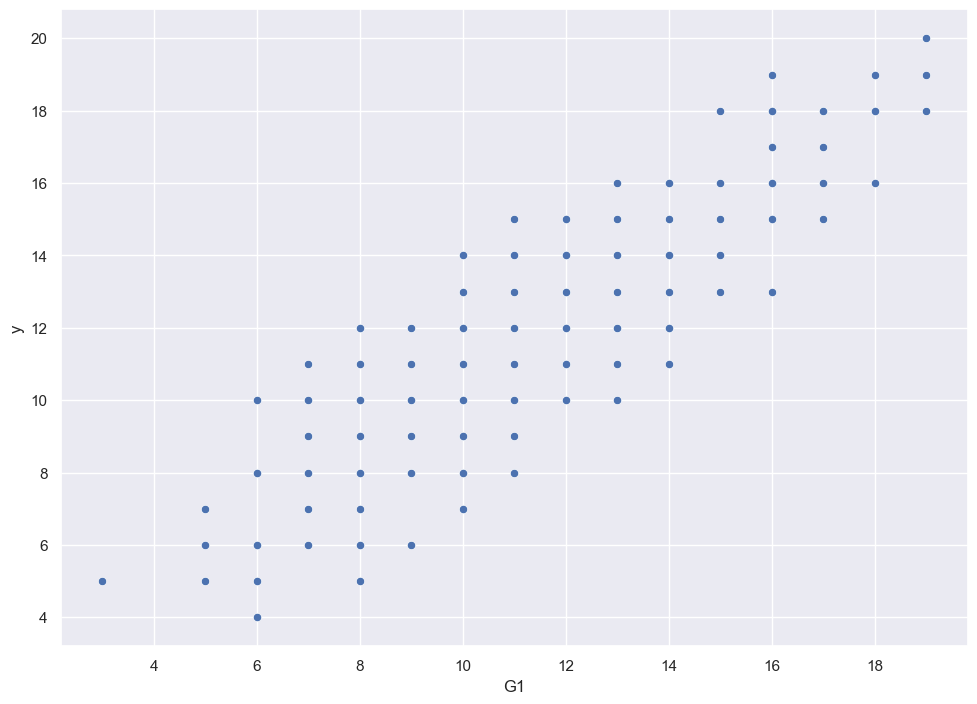

In [84]:
sns.scatterplot(x=X_y_train['G1'], y=X_y_train['y'])

<AxesSubplot: xlabel='age', ylabel='y'>

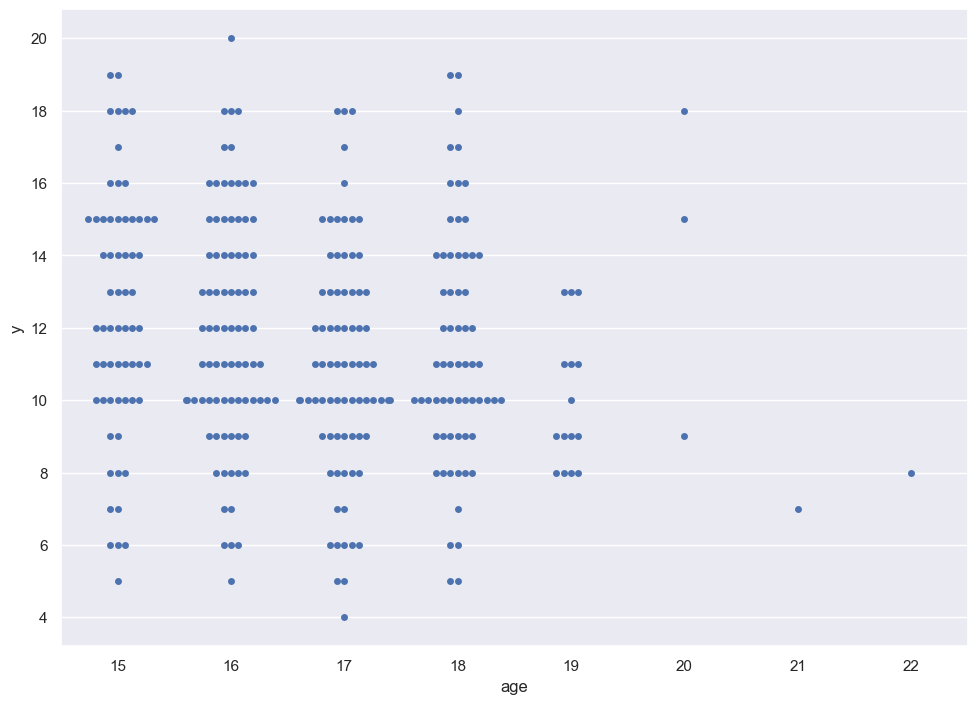

In [85]:
sns.swarmplot(x=X_y_train['age'], y=X_y_train['y'])

In [86]:
numeric_factors_to_use = ['age', 'traveltime', 'G1', 'studytime', 'Medu', 'Fedu', 'failures']

In [87]:
categorical_columns = ['school', 'gender', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                       'higher', 'internet', 'romantic']

In [88]:
X_y_train \
    .groupby('higher', as_index=False) \
    .agg({'y': 'mean'})

,higher,y
0,no,9.833333
1,yes,11.657627


In [89]:
interesting_categorical_factors = ['Mjob', 'Fjob', 'schoolsup', 'higher']

## Factors preparation

In [90]:
from category_encoders.target_encoder import TargetEncoder

In [91]:
mjob_target_encoder = TargetEncoder()
mjob_target_encoder.fit(X_y_train['Mjob'], X_y_train['y'])

fjob_target_encoder = TargetEncoder()
fjob_target_encoder.fit(X_y_train['Fjob'], X_y_train['y'])

schoolsup_target_encoder = TargetEncoder()
schoolsup_target_encoder.fit(X_y_train['schoolsup'], X_y_train['y'])

higher_target_encoder = TargetEncoder()
higher_target_encoder.fit(X_y_train['higher'], X_y_train['y'])

TargetEncoder(cols=['higher'])

In [92]:
X_y_train['Mjob_encoded'] = mjob_target_encoder.transform(X_y_train['Mjob'])
X_y_train['Fjob_encoded'] = fjob_target_encoder.transform(X_y_train['Fjob'])
X_y_train['schoolsup_encoded'] = schoolsup_target_encoder.transform(X_y_train['schoolsup'])
X_y_train['higher_encoded'] = higher_target_encoder.transform(X_y_train['higher'])

In [93]:
X_y_train

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,health,absences,G1,y,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,GP,M,17,U,GT3,T,3,3,health,other,...,4,3,5,4,14,11,13.583333,11.339181,11.835821,11.657627
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,3,2,5,0,13,14,11.744681,11.476190,11.835821,11.657627
197,GP,M,16,R,LE3,T,3,3,teacher,other,...,3,4,3,8,9,10,11.744681,11.339181,11.835821,11.657627
231,GP,M,17,R,GT3,T,2,2,other,other,...,5,2,1,4,11,11,10.962963,11.339181,11.835821,11.657627
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,6,6,6,10.962963,13.565217,9.871795,11.657627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MS,F,17,U,LE3,A,3,2,services,other,...,2,3,5,2,12,11,12.253012,11.339181,11.835821,11.657627
210,GP,F,19,U,GT3,T,3,3,other,other,...,3,3,3,10,8,8,10.962963,11.339181,11.835821,11.657627
117,GP,M,16,U,GT3,T,3,3,other,services,...,4,2,5,0,13,13,10.962963,11.476190,11.835821,11.657627
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,2,4,19,20,13.583333,11.476190,11.835821,11.657627


In [94]:
factors_to_use = numeric_factors_to_use + ['Mjob_encoded', 'Fjob_encoded', 'schoolsup_encoded', 'higher_encoded']

In [95]:
X_train_encoded = X_y_train.copy(deep=True)

In [96]:
X_train_encoded = X_train_encoded[factors_to_use]

In [97]:
X_train_encoded

,age,traveltime,G1,studytime,Medu,Fedu,failures,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,17,1,14,1,3,3,0,13.583333,11.339181,11.835821,11.657627
224,16,1,13,3,4,4,0,11.744681,11.476190,11.835821,11.657627
197,16,3,9,1,3,3,0,11.744681,11.339181,11.835821,11.657627
231,17,2,11,2,2,2,0,10.962963,11.339181,11.835821,11.657627
7,17,2,6,2,4,4,0,10.962963,13.565217,9.871795,11.657627
...,...,...,...,...,...,...,...,...,...,...,...
357,17,2,12,2,3,2,0,12.253012,11.339181,11.835821,11.657627
210,19,1,8,4,3,3,0,10.962963,11.339181,11.835821,11.657627
117,16,2,13,1,3,3,0,10.962963,11.476190,11.835821,11.657627
47,16,1,19,4,4,3,0,13.583333,11.476190,11.835821,11.657627


In [108]:
X_train_encoded.head(6)

,age,traveltime,G1,studytime,Medu,Fedu,failures,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,17,1,14,1,3,3,0,13.583333,11.339181,11.835821,11.657627
224,16,1,13,3,4,4,0,11.744681,11.476190,11.835821,11.657627
197,16,3,9,1,3,3,0,11.744681,11.339181,11.835821,11.657627
231,17,2,11,2,2,2,0,10.962963,11.339181,11.835821,11.657627
7,17,2,6,2,4,4,0,10.962963,13.565217,9.871795,11.657627
64,15,1,10,2,4,3,0,12.253012,11.476190,9.871795,11.657627


In [99]:
scaler = MinMaxScaler()
scaler.fit(X_train_encoded)

MinMaxScaler()

In [101]:
X_train_scaled = scaler.transform(X_train_encoded)

In [115]:
y_train

295    11
224    14
197    10
231    11
7       6
       ..
357    11
210     8
117    13
47     20
190    13
Name: G3, Length: 307, dtype: int64

## Creating a model

In [113]:
model = LinearRegression()

In [116]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [117]:
model.score(X_train_scaled, y_train)

0.8207404362525064

## Quality control

In [118]:
X_test['Mjob_encoded'] = mjob_target_encoder.transform(X_test['Mjob'])
X_test['Fjob_encoded'] = fjob_target_encoder.transform(X_test['Fjob'])
X_test['schoolsup_encoded'] = schoolsup_target_encoder.transform(X_test['schoolsup'])
X_test['higher_encoded'] = higher_target_encoder.transform(X_test['higher'])

In [119]:
X_test_encoded = X_test[factors_to_use]

In [121]:
X_test_scaled = scaler.transform(X_test_encoded)

In [123]:
model.score(X_test_scaled, y_test)

0.726363892547719

In [124]:
model.predict(X_test_scaled)

array([12.29556389, 11.13496186,  9.23502848, 12.50097855,  7.97202549,
        7.59548334, 10.52671051, 10.9914081 , 14.97466503, 15.3202819 ,
       12.50924805, 12.59191577, 14.24416646, 14.12688969,  9.09937801,
       11.08069627, 13.93153623, 14.04537752, 15.95809453, 12.20905772,
        6.67143378, 15.68982302,  8.98434064, 10.83619766,  7.99038311,
       12.94937609, 12.39051731,  8.63914491, 14.39092562,  7.84456622,
        7.65705823,  7.90274697, 12.26958421,  8.8951469 , 10.73672969,
       14.07200969, 12.02055174,  7.93833316, 11.67261083, 18.09847844,
       13.6815412 , 12.86782138, 15.24938209,  9.29402072,  6.97921845,
       13.65775549,  8.19458716,  9.33473482, 11.23007644, 13.36659552])

In [125]:
def score_model(model, X_test, y_test):
    y_preds = model.predict(X_test)
    
    errs = []
    
    for y, y_pred in zip(y_test, y_preds):
        errs.append(abs(y - y_pred))
        
    mae = sum(errs) / len(errs)
    
    mean_y_test = sum(y_test) / len(y_test)
    r2 = 1 - sum(err ** 2 for err in errs) / sum((y - mean_y_test) ** 2 for y in y_test)
    
    return mae, r2

In [126]:
score_model(model, X_test_scaled, y_test)

(1.294071521955721, 0.726363892547719)

In [135]:
maes = []
r2s = []

X_y_test = X_test_encoded.copy(deep=True)
X_y_test['y'] = y_test

for i in range(1000):
    X_y_sample = X_y_test.sample(len(X_y_test), replace=True)
    
    X_test_sample = X_y_sample.drop(columns=['y'])
    X_test_sample = scaler.transform(X_test_sample)
    y_test_sample = X_y_sample['y']
    
    mae_sample, r2_sample = score_model(model, X_test_sample, y_test_sample)
    
    maes.append(mae_sample)
    r2s.append(r2_sample)

In [136]:
maes = list(sorted(maes))

In [138]:
maes = maes[25:975]

In [139]:
maes[0], maes[-1]

(1.0353745408510524, 1.519218999378254)

<AxesSubplot: ylabel='Count'>

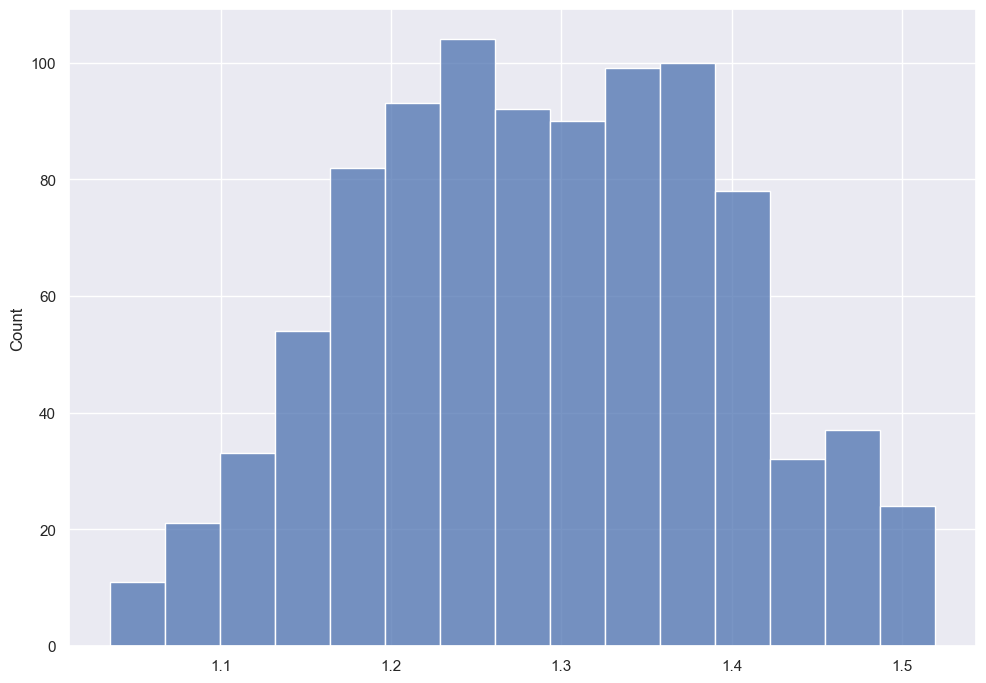

In [140]:
sns.histplot(maes)

## Model interpretation

In [150]:
model.coef_

array([-2.07081845, -0.09387195, 14.04355785,  0.24644115,  0.37359536,
       -0.44188986,  0.05824508,  0.51553489,  0.0292249 ,  0.17249021,
       -0.26751205])

In [153]:
for x, y in zip(X_train_encoded.columns, model.coef_):
    print(x, round(y, 2))

age -2.07
traveltime -0.09
G1 14.04
studytime 0.25
Medu 0.37
Fedu -0.44
failures 0.06
Mjob_encoded 0.52
Fjob_encoded 0.03
schoolsup_encoded 0.17
higher_encoded -0.27


In [154]:
X_y_train.groupby('age').agg({'y': 'mean'})

,y
age,
15,12.412698
16,11.963855
17,10.961039
18,11.421875
19,10.000000
20,14.000000
21,7.000000
22,8.000000


<AxesSubplot: xlabel='age', ylabel='y'>

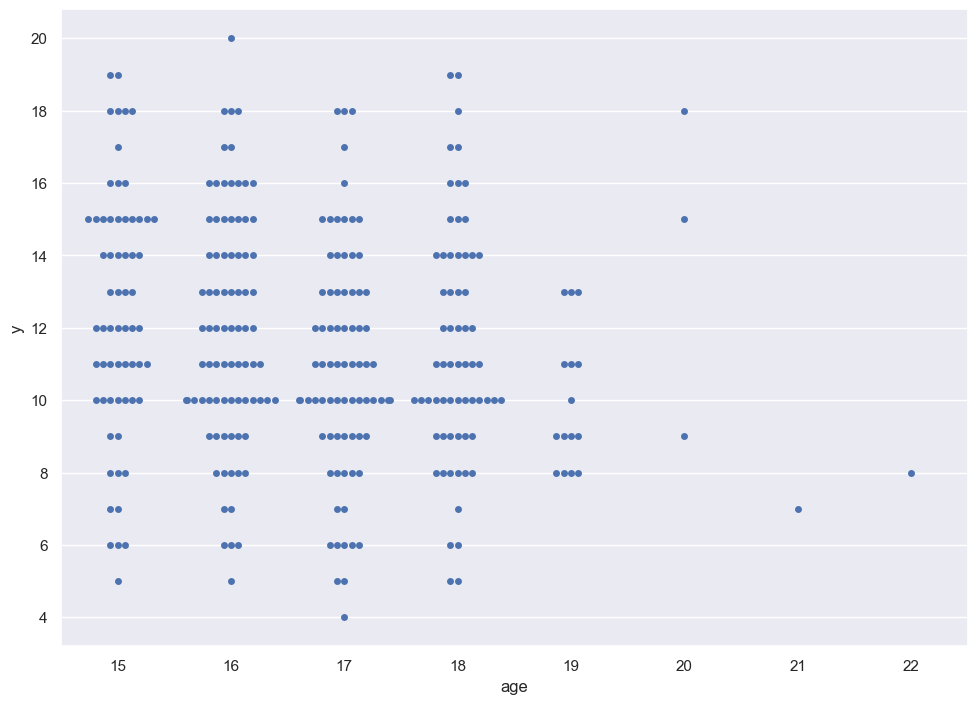

In [155]:
sns.swarmplot(x=X_y_train['age'], y=X_y_train['y'])